## Tic-Tac-Toe Agent

#### Importing libraries

In [2]:
import collections
from itertools import product
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time
from TC_Env import TicTacToe
%matplotlib inline

In [3]:
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

rewards_tracked = {"{'0': 1, '1': 0, '2': 2, '3': 4, '4': 7, '5': 6, '6': 0, '7': 0, '8': 0}":[],"{'0': 1, '1': 2, '2': 0, '3': 0, '4': 5, '5': 4, '6': 0, '7': 0, '8': 9}":[],"{'0': 0, '1': 8, '2': 0, '3': 0, '4': 5, '5': 0, '6': 0, '7': 2, '8': 0}":[],"{'0': 7, '1': 4, '2': 9, '3': 3, '4': 2, '5': 0, '6': 5, '7': 0, '8': 0}":[]}


print(len(Q_dict))
print(len(rewards_tracked))
print(len(States_track))

0
4
0


In [4]:
### Defining all valid actions for each state.
def agent_valid_actions(state):
    
    allowed_posn = ['0','1','2','3','4','5','6','7','8']
    allowed_val  = [1,3,5,7,9]
    valid_Actions = list(product(allowed_posn,allowed_val))
    return valid_Actions

### Defining all valid agent positions which are available to take
def allowed_agent_positions(curr_state):
        index_list = []
        for key,value in curr_state.items():
            if value == 0:
                index_list.append(key)
        if index_list == []:
            return None
        else:
            return index_list

### Defining all valid agent values which are available to take
def allowed_agent_values(curr_state):
        allowed_values = [1,3,5,7,9]
        used_values =[]
        for key,value in curr_state.items():
            if value in [1,3,5,7,9]:
                used_values.append(value)
        allowed_values = [x for x in allowed_values if x not in used_values]
        if allowed_values == []:
             return None
        else:
             return allowed_values

In [5]:
### Defind a function to add the state and valid action values to the Q_dict
def add_to_dict(state,valid_act):
    
     if str(state) not in Q_dict.keys():
        Q_dict[str(state)] = {}
        for action in valid_act:
            Q_dict[str(state)][action] = 0.0

In [6]:
### Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [7]:
### Function for initialising tracking states
def initialise_tracking_states():

    sample_q_values={"{'0': 1, '1': 2, '2': 8, '3': 5, '4': 9, '5': 4, '6': 3, '7': 7, '8': 6}":('5', 9),"{'0': 1, '1': 6, '2': 3, '3': 7, '4': 2, '5': 4, '6': 8, '7': 9, '8': 5}":('1', 3),"{'0': 0, '1': 3, '2': 5, '3': 7, '4': 2, '5': 0, '6': 0, '7': 4, '8': 8}":('6', 9),"{'0': 1, '1': 6, '2': 0, '3': 0, '4': 7, '5': 0, '6': 2, '7': 0, '8': 0}":('7', 7)}
    for key,q_values in sample_q_values.items():
        state = key
        action = q_values
        States_track[str(state)][action] = []   

In [8]:
### Function for saving q values to tracking states

def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[str(state)].keys():
            if state in Q_dict and action in Q_dict[str(state)]:
                States_track[str(state)][action].append(Q_dict[str(state)][action])  

#### Epsilon-greedy strategy

In [9]:
def epsilon_greedy(state, time):
    epsilon = - 1/ (1 + np.exp((-time+7500000)/1700000)) + 1
    z = np.random.random()
        
    if z > epsilon:
        action = max(Q_dict[str(state)],key=Q_dict[str(state)].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        action = random.sample(list(zip(allowed_agent_positions(state),allowed_agent_values(state))),1)    #Exploration: randomly choosing and action
        action = action[0]
    
    return action

#### Define hyperparameters

In [10]:
#Defining parameters for the experiment
EPISODES = 3000000
STEPS = 5
LR = 0.01                   #learning rate
GAMMA = 0.91
threshold = 2000       #every these many episodes, the 4 Q-values will be stored/appended (convergence graphs)
policy_threshold = 30000    #every these many episodes, the Q-dict will be updated

### Q-update loop

In [11]:
for episode in range(0,EPISODES):


    
    env = TicTacToe()  
    initial_state = env.state   
    curr_state = env.state     
    
    add_to_dict(curr_state,agent_valid_actions(curr_state))
    
    time_step = 0
    reward = None
    total_reward = 0
    
    
    while time_step < STEPS:    #the episode will run only for a few steps and not infinitely
        
         
        curr_action = epsilon_greedy(curr_state, episode)

        next_state, reward = env.step(curr_state, curr_action)

        
        add_to_dict(next_state,agent_valid_actions(next_state))
        

        
            
        # UPDATE RULE
        max_next = max(Q_dict[str(next_state)],key=Q_dict[str(next_state)].get)   #this gets the action corresponding to max q-value of next state
        Q_dict[str(curr_state)][curr_action] += LR * ((reward + (GAMMA*(Q_dict[str(next_state)][max_next]))) - Q_dict[str(curr_state)][curr_action] ) 


        curr_state = next_state       

        total_reward += reward
        
        time_step += 1
        ### break if it is a winning state or tie as no further state is possible
        if reward == 10:
            break
        if reward == -10: 
            break
        if reward == 0: 
            break

    
    #TRACKING REWARDS
    if str(initial_state) in rewards_tracked:     #storing rewards
        rewards_tracked[str(initial_state)].append(total_reward)


    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_obj(rewards_tracked,'Rewards')   
    
#     #TRACKING Q-VALUES
    if (episode == threshold-1):        #at the 1999th episode
        initialise_tracking_states()
      
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')   
    
#     #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')    
        
        
save_obj(rewards_tracked,'Rewards')   
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')      
print(episode)

2999999


#### Check the Q-dictionary

In [12]:
all_actions = {('0', 1): 0.0,
 ('0', 3): 0.0,
 ('0', 5): 0.0,
 ('0', 7): 0.0,
 ('0', 9): 0.0,
 ('1', 1): 0.0,
 ('1', 3): 0.0,
 ('1', 5): 0.0,
 ('1', 7): 0.0,
 ('1', 9): 0.0,
 ('2', 1): 0.0,
 ('2', 3): 0.0,
 ('2', 5): 0.0,
 ('2', 7): 0.0,
 ('2', 9): 0.0,
 ('3', 1): 0.0,
 ('3', 3): 0.0,
 ('3', 5): 0.0,
 ('3', 7): 0.0,
 ('3', 9): 0.0,
 ('4', 1): 0.0,
 ('4', 3): 0.0,
 ('4', 5): 0.0,
 ('4', 7): 0.0,
 ('4', 9): 0.0,
 ('5', 1): 0.0,
 ('5', 3): 0.0,
 ('5', 5): 0.0,
 ('5', 7): 0.0,
 ('5', 9): 0.0,
 ('6', 1): 0.0,
 ('6', 3): 0.0,
 ('6', 5): 0.0,
 ('6', 7): 0.0,
 ('6', 9): 0.0,
 ('7', 1): 0.0,
 ('7', 3): 0.0,
 ('7', 5): 0.0,
 ('7', 7): 0.0,
 ('7', 9): 0.0,
 ('8', 1): 0.0,
 ('8', 3): 0.0,
 ('8', 5): 0.0,
 ('8', 7): 0.0,
 ('8', 9): 0.0}
for key,value in Q_dict.items():
    for k,v in value.items():
        if k in all_actions.keys():
            if v > all_actions[k]:
                all_actions.update({k:v})

In [13]:
print(all_actions)

{('0', 1): 40.262016572277844, ('0', 3): 6.410604600539843, ('0', 5): 0.0, ('0', 7): 0.0, ('0', 9): 0.0, ('1', 1): 15.080687655958643, ('1', 3): 36.30060946616096, ('1', 5): 0.29973008100000004, ('1', 7): 0.4991008096355657, ('1', 9): 0.29973008100000004, ('2', 1): 16.02712222305355, ('2', 3): 7.5239339499751345, ('2', 5): 68.42171162631097, ('2', 7): 0.39946032392710007, ('2', 9): 0.39946032392710007, ('3', 1): 14.994182420136767, ('3', 3): 15.598086572150313, ('3', 5): 14.208808493578358, ('3', 7): 110.11956832374567, ('3', 9): 0.0, ('4', 1): 9.017248809236804, ('4', 3): 16.686842793708273, ('4', 5): 26.645932234228294, ('4', 7): 110.11060010593825, ('4', 9): 110.02419094953962, ('5', 1): 4.508067773198402, ('5', 3): 18.143565204868075, ('5', 5): 39.49403956552236, ('5', 7): 108.91131327729286, ('5', 9): 110.1328701486646, ('6', 1): 30.761695902445503, ('6', 3): 36.63757944475037, ('6', 5): 35.60173372525507, ('6', 7): 45.75977274659355, ('6', 9): 56.995364753272106, ('7', 1): 17.555

#### Check the states tracked for Q-values convergence

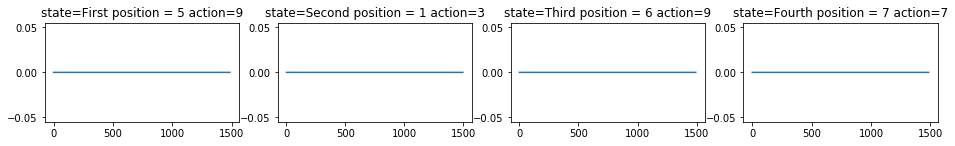

In [14]:
xaxis0 = np.asarray(range(0, len(States_track[str({'0': 1, '1': 2, '2': 8, '3': 5, '4': 9, '5': 4, '6': 3, '7': 7, '8': 6})][('5', 9)])))
xaxis1 = np.asarray(range(0, len(States_track[str({'0': 1, '1': 6, '2': 3, '3': 7, '4': 2, '5': 4, '6': 8, '7': 9, '8': 5})][('1', 3)])))
xaxis2 = np.asarray(range(0, len(States_track[str({'0': 0, '1': 3, '2': 5, '3': 7, '4': 2, '5': 0, '6': 0, '7': 4, '8': 8})][('6', 9)])))
xaxis3 = np.asarray(range(0, len(States_track[str({'0': 1, '1': 6, '2': 0, '3': 0, '4': 7, '5': 0, '6': 2, '7': 0, '8': 0})][('7', 7)])))

plt.figure(0, figsize=(16,4))
plt.subplot(241)
plt.title('state=First position = 5 action=9')
plt.plot(xaxis0,np.asarray(States_track[str({'0': 1, '1': 2, '2': 8, '3': 5, '4': 9, '5': 4, '6': 3, '7': 7, '8': 6})][('5', 9)]))
plt.subplot(242)
plt.title('state=Second position = 1 action=3')
plt.plot(xaxis1,np.asarray(States_track[str({'0': 1, '1': 6, '2': 3, '3': 7, '4': 2, '5': 4, '6': 8, '7': 9, '8': 5})][('1', 3)]))
plt.subplot(243)
plt.title('state=Third position = 6 action=9')
plt.plot(xaxis2,np.asarray(States_track[str({'0': 0, '1': 3, '2': 5, '3': 7, '4': 2, '5': 0, '6': 0, '7': 4, '8': 8})][('6', 9)]))
plt.subplot(244)
plt.title('state=Fourth position = 7 action=7')
plt.plot(xaxis3,np.asarray(States_track[str({'0': 1, '1': 6, '2': 0, '3': 0, '4': 7, '5': 0, '6': 2, '7': 0, '8': 0})][('7', 7)]))


plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


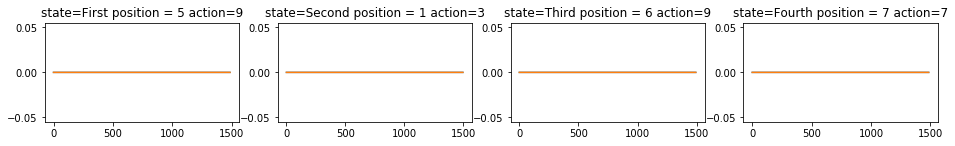

In [16]:
xaxis0 = np.asarray(range(0, len(States_track[str({'0': 1, '1': 2, '2': 8, '3': 5, '4': 9, '5': 4, '6': 3, '7': 7, '8': 6})][('5', 9)])))
xaxis1 = np.asarray(range(0, len(States_track[str({'0': 1, '1': 6, '2': 3, '3': 7, '4': 2, '5': 4, '6': 8, '7': 9, '8': 5})][('1', 3)])))
xaxis2 = np.asarray(range(0, len(States_track[str({'0': 0, '1': 3, '2': 5, '3': 7, '4': 2, '5': 0, '6': 0, '7': 4, '8': 8})][('6', 9)])))
xaxis3 = np.asarray(range(0, len(States_track[str({'0': 1, '1': 6, '2': 0, '3': 0, '4': 7, '5': 0, '6': 2, '7': 0, '8': 0})][('7', 7)])))

plt.figure(0, figsize=(16,4))
plt.subplot(241)
plt.title('state=First position = 5 action=9')
plt.plot(xaxis0,np.asarray(States_track[str({'0': 1, '1': 2, '2': 8, '3': 5, '4': 9, '5': 4, '6': 3, '7': 7, '8': 6})][('5', 9)]))
plt.subplot(242)
plt.title('state=Second position = 1 action=3')
plt.plot(xaxis1,np.asarray(States_track[str({'0': 1, '1': 6, '2': 3, '3': 7, '4': 2, '5': 4, '6': 8, '7': 9, '8': 5})][('1', 3)]))
plt.subplot(243)
plt.title('state=Third position = 6 action=9')
plt.plot(xaxis2,np.asarray(States_track[str({'0': 0, '1': 3, '2': 5, '3': 7, '4': 2, '5': 0, '6': 0, '7': 4, '8': 8})][('6', 9)]))
plt.subplot(244)
plt.title('state=Fourth position = 7 action=7')
plt.plot(xaxis3,np.asarray(States_track[str({'0': 1, '1': 6, '2': 0, '3': 0, '4': 7, '5': 0, '6': 2, '7': 0, '8': 0})][('7', 7)]))
plt.show()

#### It seems that with 3 Million episodes the specific states are converged